In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data1=pd.read_csv("/content/irisexcel (2).csv")
data1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


          PC1       PC2      class
0   -2.684207  0.326607     setosa
1   -2.715391 -0.169557     setosa
2   -2.889820 -0.137346     setosa
3   -2.746437 -0.311124     setosa
4   -2.728593  0.333925     setosa
..        ...       ...        ...
145  1.944017  0.187415  virginica
146  1.525664 -0.375021  virginica
147  1.764046  0.078519  virginica
148  1.901629  0.115877  virginica
149  1.389666 -0.282887  virginica

[150 rows x 3 columns]


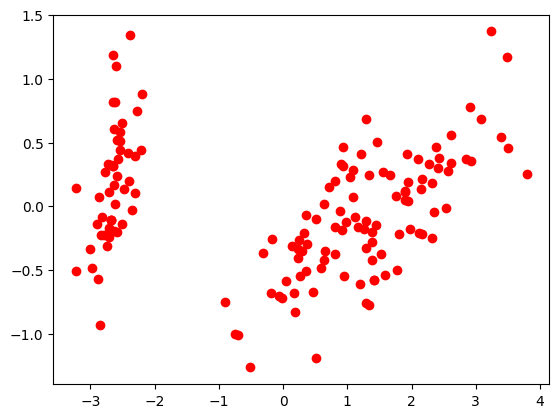

In [ ]:
x=data1[["sepal_length","sepal_width","petal_length","petal_width"]]
y=data1["species"]
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
df_pc=pd.DataFrame(data=x_pca,columns=["PC1","PC2"])
df_pc['class']=y
print(df_pc)
plt.scatter(df_pc["PC1"],df_pc["PC2"],c="r")


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] 
 [[ 1.38566031 -0.0697412 ]
 [-2.53601981  0.12763956]]


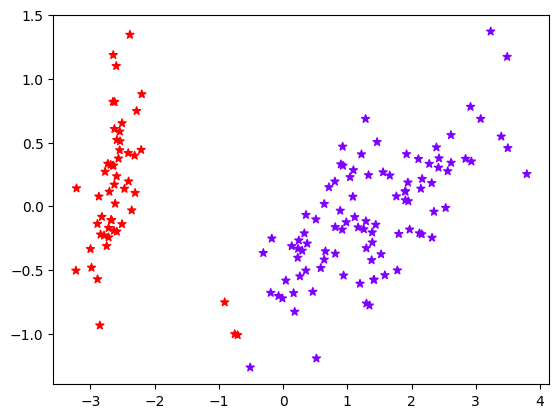

In [ ]:
#Applying KMeans
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,max_iter=3)
a=df_pc[['PC1','PC2']]
a1=a[['PC1']]
a2=a[['PC2']]

model1=model.fit(a)
print(model1.labels_,"\n",model1.cluster_centers_)
plt.scatter(a1,a2,c=model.labels_,cmap='rainbow',marker="*")

          LD1       LD2
0    8.084953 -0.328454
1    7.147163  0.755473
2    7.511378  0.238078
3    6.837676  0.642885
4    8.157814 -0.540639
..        ...       ...
145 -5.674013 -1.661346
146 -5.197129  0.365506
147 -4.981712 -0.812973
148 -5.901486 -2.320751
149 -4.684009 -0.325081

[150 rows x 2 columns]


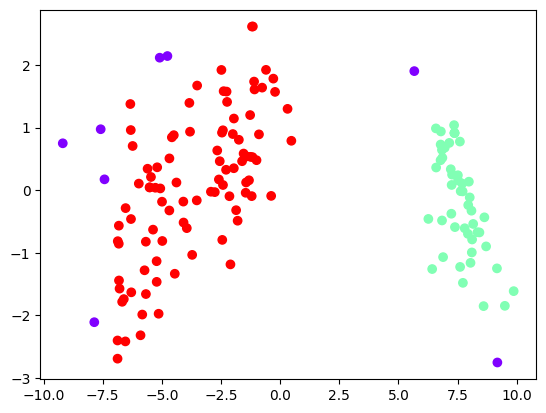

In [ ]:
#Applying DBSCAN on LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
llda=lda.fit_transform(x,y)
df_ld=pd.DataFrame(data=llda,columns=["LD1","LD2"])
print(df_ld)

b=df_ld
b1=b[["LD1"]]
b2=b[["LD2"]]

from sklearn.cluster import DBSCAN
model3=DBSCAN(eps=0.888,min_samples=3)
model4=model3.fit(b)
labels2=model4.labels_
plt.scatter(b1,b2,c=labels2,cmap="rainbow")

